# Visualization of Hyperparameter Effectiveness

In [12]:
include("hyperparamviz.jl");
logfiles = get_hyperparam_logfiles()

6-element Array{AbstractString,1}:
 "validation_results_following_bayesian_network.csv"  
 "validation_results_following_dynamic_forest.csv"    
 "validation_results_following_linear_bayesian.csv"   
 "validation_results_following_linear_gaussian.csv"   
 "validation_results_following_mixture_regression.csv"
 "validation_results_following_random_forest.csv"     

In [17]:
logfile = logfiles[3]
println("loading ", logfile)
df = load_hyperparam_log(logfile)
print_log_statistics(df)

loading validation_results_following_linear_bayesian.csv
n entries:                                       40

max mean logl train:              11.767211      26
max mean logl test:               11.413878      26
max median logl train:            12.947311      34
max median logl test:             12.783243      34
min rwse speed 4sec:               1.613184      19
min rwse posFt 4sec:               2.101455       1
min L2 rwse:                       5.346989       3

	               hyperparameters             min value             max value  best param to min L2 rwse
	     ridge_regression_constant              0.000000              0.009171              0.000486
	                     min_σ_lat              0.000000              0.000086              0.000000
	                     min_σ_lon              0.000000              0.000010              0.000007
	                   max_parents              1.000000              9.000000              3.000000


In [18]:
target_names = get_target_names(df)

6-element Array{Symbol,1}:
 :mean_logl_test   
 :mean_logl_train  
 :median_logl_test 
 :median_logl_train
 :rwse_speed_4     
 :rwse_posft_4     

In [19]:
hyperparam_names = get_hyperparam_names(df)

4-element Array{Symbol,1}:
 :ridge_regression_constant
 :min_σ_lat                
 :min_σ_lon                
 :max_parents              

Interact.Options{:ToggleButtons,Symbol}(Signal{Symbol}(mean_logl_test, nactions=0),"target",:mean_logl_test,"mean_logl_test",Interact.OptionDict(Any["mean_logl_test","mean_logl_train","median_logl_test","median_logl_train","rwse_speed_4","rwse_posft_4"],Dict{Any,Any}("mean_logl_train"=>:mean_logl_train,"median_logl_test"=>:median_logl_test,"median_logl_train"=>:median_logl_train,"mean_logl_test"=>:mean_logl_test,"rwse_posft_4"=>:rwse_posft_4,"rwse_speed_4"=>:rwse_speed_4)),Any[],Any[])

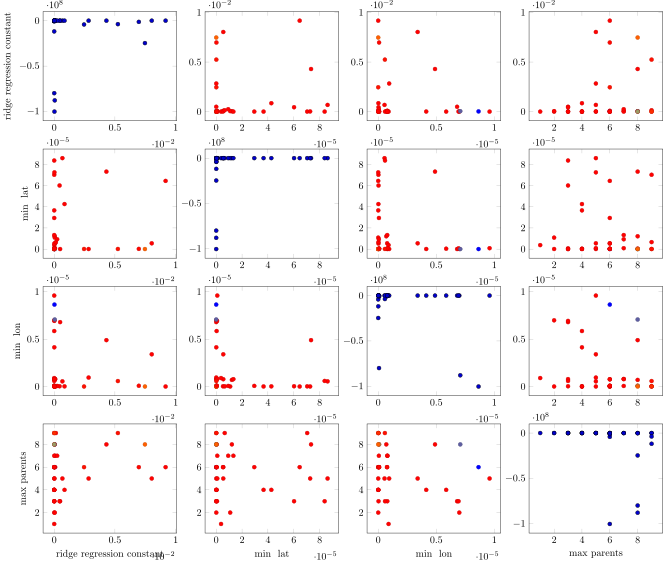

In [20]:
include("hyperparamviz.jl");
@manipulate for target in target_names
    scatter_performance(df, target)
end